In [8]:
#激活函数

%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt
%run d2lzh_pytorch.ipynb
import sys
sys.path.append('/home/cxking/桌面/code/d2lzh_pytorch')
import utils as d2l


def xyplot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')


[NbConvertApp] WARNING | pattern 'file_name.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdout 

# ReLU(x)=max(x,0).

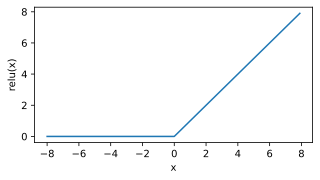

In [10]:
#Relu
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')


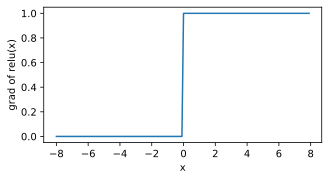

In [11]:
#导数
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')


# 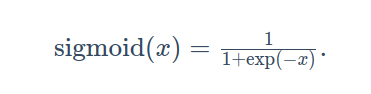

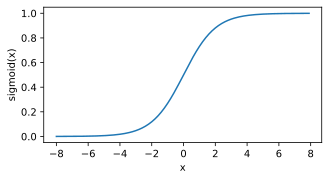

In [12]:
#sigmoid
y = x.sigmoid()
xyplot(x, y, 'sigmoid')


# 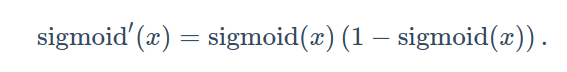

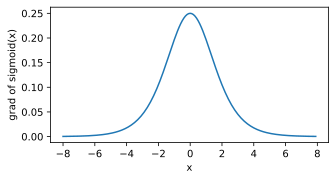

In [13]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')


# 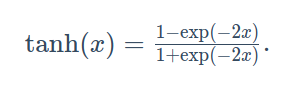

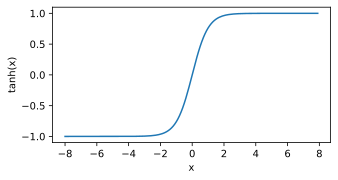

In [14]:
#tanh
y = x.tanh()
xyplot(x, y, 'tanh')


# 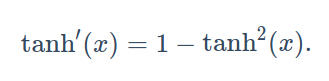

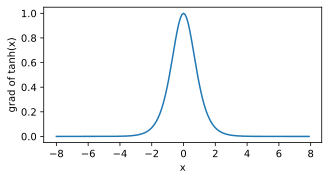

In [15]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')


# 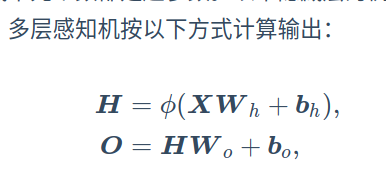

# Fashion-MNIST数据集

In [18]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


# 定义模型参数

In [20]:

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)


# 定义激活函数Relu

In [21]:
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))


# 定义模型

In [22]:
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2


# 定义损失函数

In [23]:
loss = torch.nn.CrossEntropyLoss()


# 训练模型

In [24]:
num_epochs, lr = 5, 100.0
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)


epoch 1, loss 0.0031, train acc 0.709, test acc 0.810
epoch 2, loss 0.0019, train acc 0.823, test acc 0.781
epoch 3, loss 0.0017, train acc 0.844, test acc 0.831
epoch 4, loss 0.0015, train acc 0.857, test acc 0.808
epoch 5, loss 0.0015, train acc 0.863, test acc 0.800
